### Importing Libraries

In [59]:

import os
import zipfile
import joblib
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score, classification_report

### Load the  dataset

In [71]:
df = pd.read_csv("C:\\HeartDisease\\Dataset\\Heart_Data.csv")
print(df.head())

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1  


### Exploring the Dataset

In [72]:
df.shape

(303, 14)

In [73]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [74]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [75]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [76]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [77]:
df.isnull().any()

age         False
sex         False
cp          False
trestbps    False
chol        False
fbs         False
restecg     False
thalach     False
exang       False
oldpeak     False
slope       False
ca          False
thal        False
target      False
dtype: bool

In [78]:
df. info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [79]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


### Data Visulaization

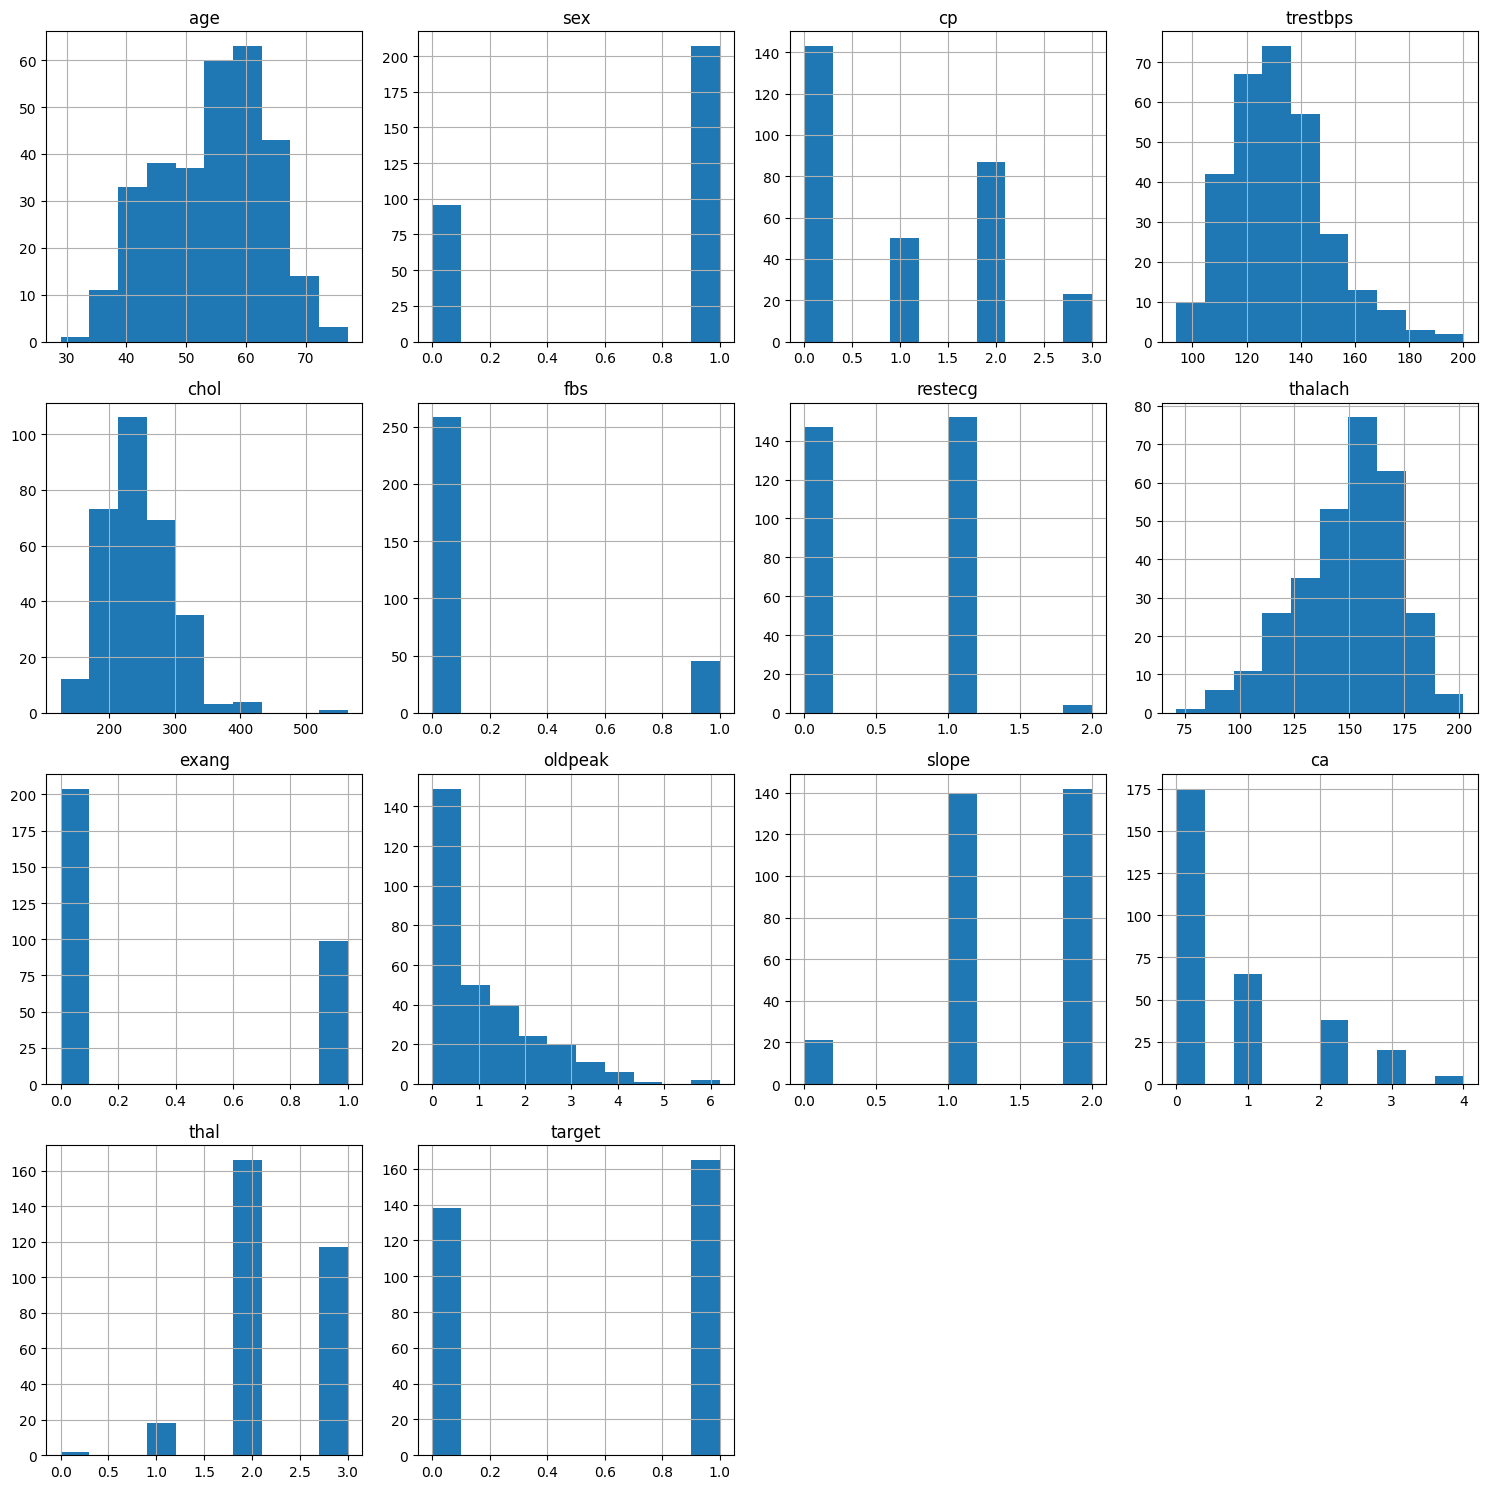

In [80]:
df.hist(figsize=(15, 15))
plt.tight_layout()
plt.show()

Text(0, 0.5, 'Count')

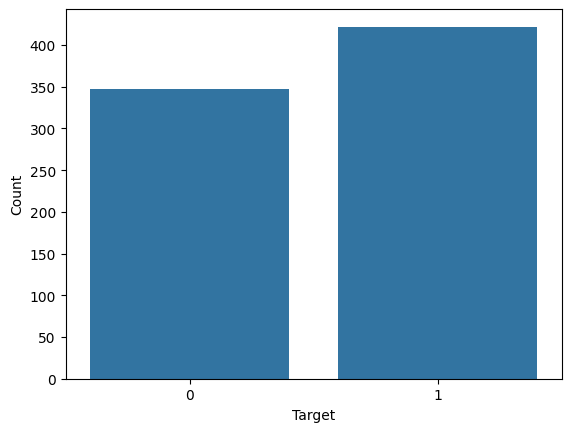

In [24]:
g = sns.countplot(x='target', data=df)
plt.xlabel('Target')
plt.ylabel('Count')

### Data Preprocessing

In [81]:

df.isnull().sum()[df.isnull().sum()>0].sort_values(ascending=False)

Series([], dtype: int64)

In [26]:
cat_cols = df.select_dtypes(include='object').columns.tolist()
cat_cols

# find Numerical Columns
Num_cols = df.select_dtypes(exclude='object').columns.tolist()
Num_cols

['age',
 'sex',
 'cp',
 'trestbps',
 'chol',
 'fbs',
 'restecg',
 'thalach',
 'exang',
 'oldpeak',
 'slope',
 'ca',
 'thal',
 'target']

In [82]:

heart_data = pd.get_dummies(df, columns=['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'])

## Feature Engineering

### Feature Selection

In [83]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

<Axes: >

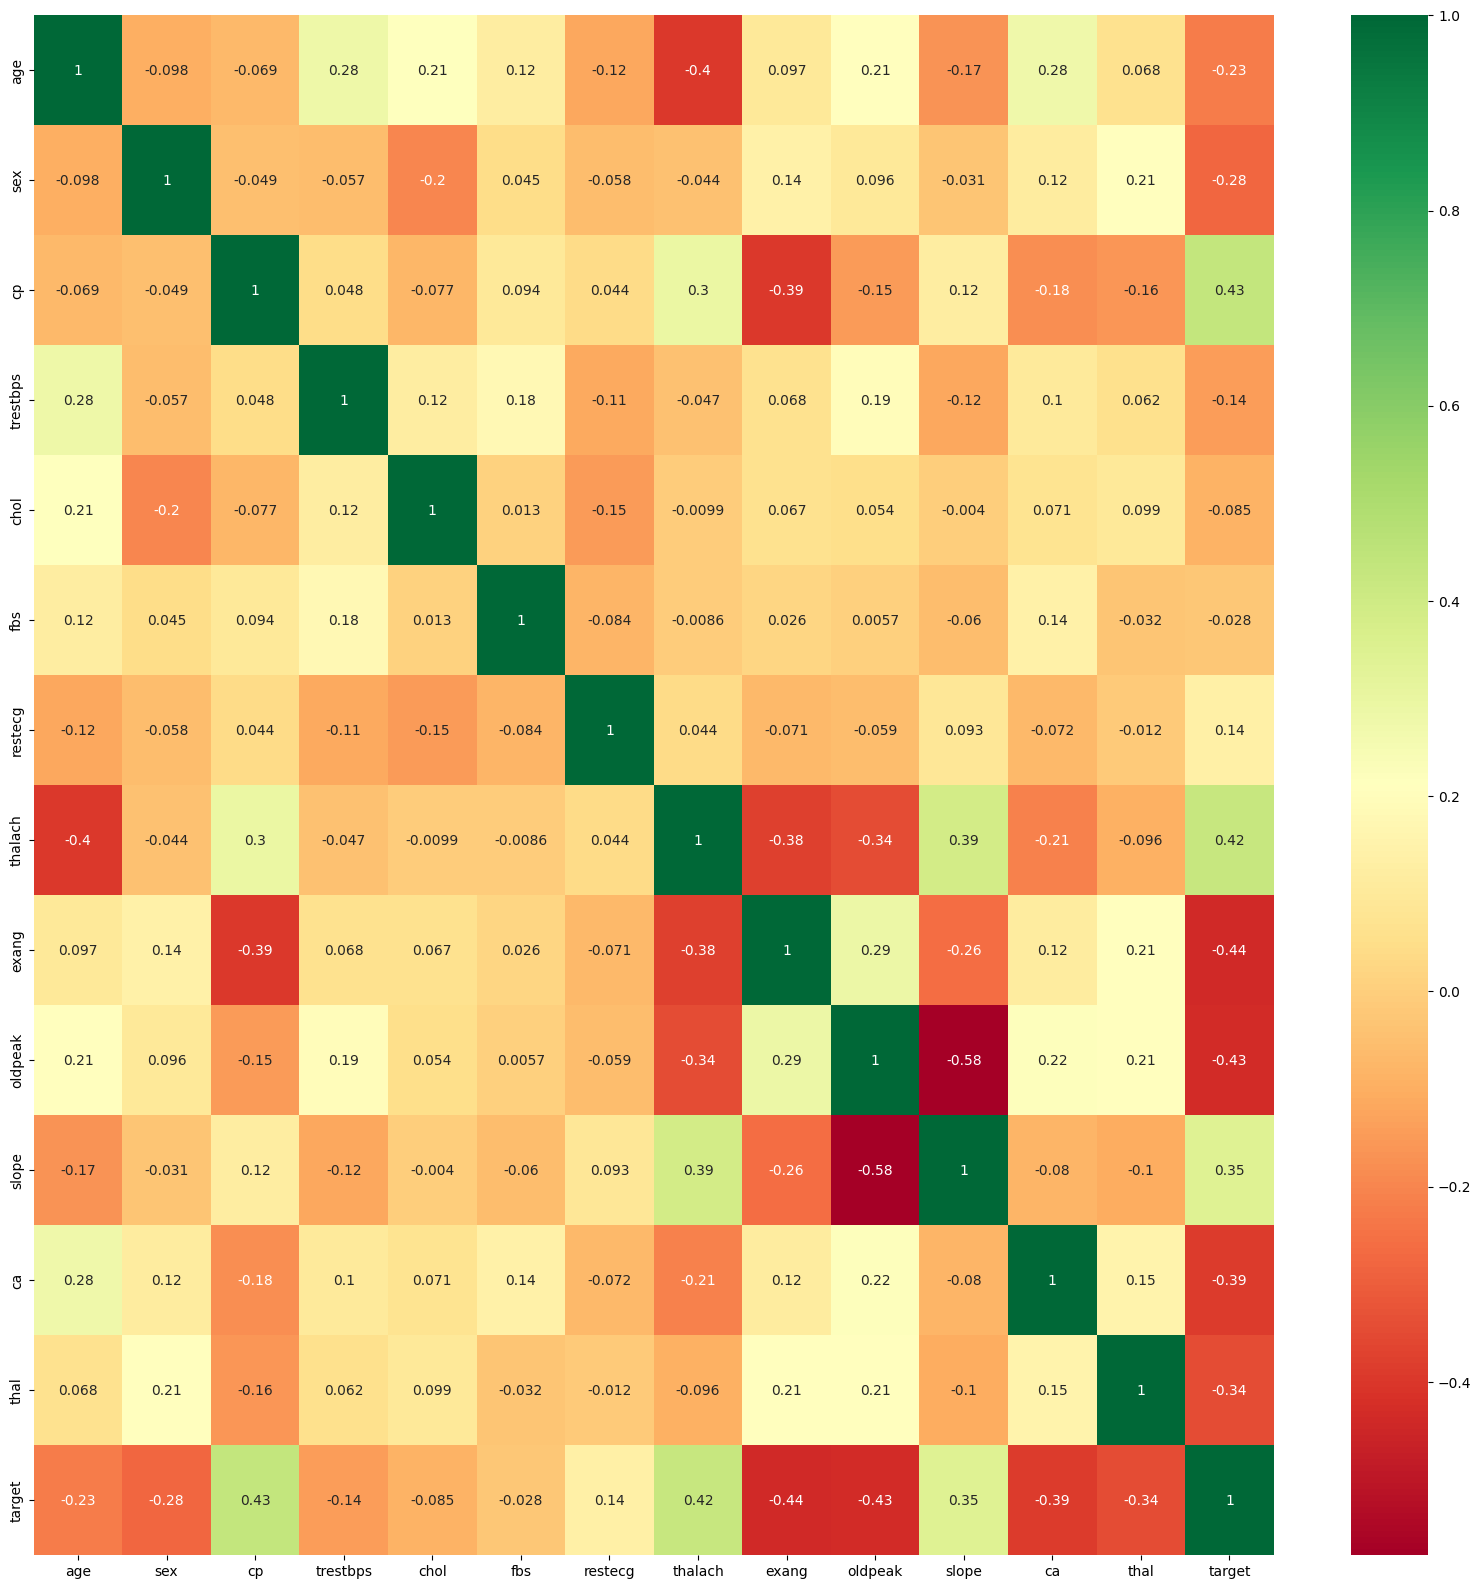

In [84]:
# Selecting correlated features using Heatmap

# Get correlation of all the features of the dataset
corr_matrix = df.corr()
top_corr_features = corr_matrix.index

# Plotting the heatmap
plt.figure(figsize=(20,20))
sns.heatmap(data=df[top_corr_features].corr(), annot=True, cmap='RdYlGn')

In [85]:
heart_data.columns

Index(['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'target', 'sex_0',
       'sex_1', 'cp_0', 'cp_1', 'cp_2', 'cp_3', 'fbs_0', 'fbs_1', 'restecg_0',
       'restecg_1', 'restecg_2', 'exang_0', 'exang_1', 'slope_0', 'slope_1',
       'slope_2', 'ca_0', 'ca_1', 'ca_2', 'ca_3', 'ca_4', 'thal_0', 'thal_1',
       'thal_2', 'thal_3'],
      dtype='object')

In [86]:
from sklearn.preprocessing import StandardScaler
standScaler = StandardScaler()
columns_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
heart_data[columns_to_scale] = standScaler.fit_transform(heart_data[columns_to_scale])

In [87]:
heart_data.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,0.952197,0.763956,-0.256334,0.015443,1.087338,1,False,True,False,False,...,False,True,False,False,False,False,False,True,False,False
1,-1.915313,-0.092738,0.072199,1.633471,2.122573,1,False,True,False,False,...,False,True,False,False,False,False,False,False,True,False
2,-1.474158,-0.092738,-0.816773,0.977514,0.310912,1,True,False,False,True,...,True,True,False,False,False,False,False,False,True,False
3,0.180175,-0.663867,-0.198357,1.239897,-0.206705,1,False,True,False,True,...,True,True,False,False,False,False,False,False,True,False
4,0.290464,-0.663867,2.082050,0.583939,-0.379244,1,True,False,True,False,...,True,True,False,False,False,False,False,False,True,False


### Test and Split Data

In [118]:
# Splitting the dataset into dependent and independent features

X = heart_data.drop(['target'], axis=1)
y = heart_data['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

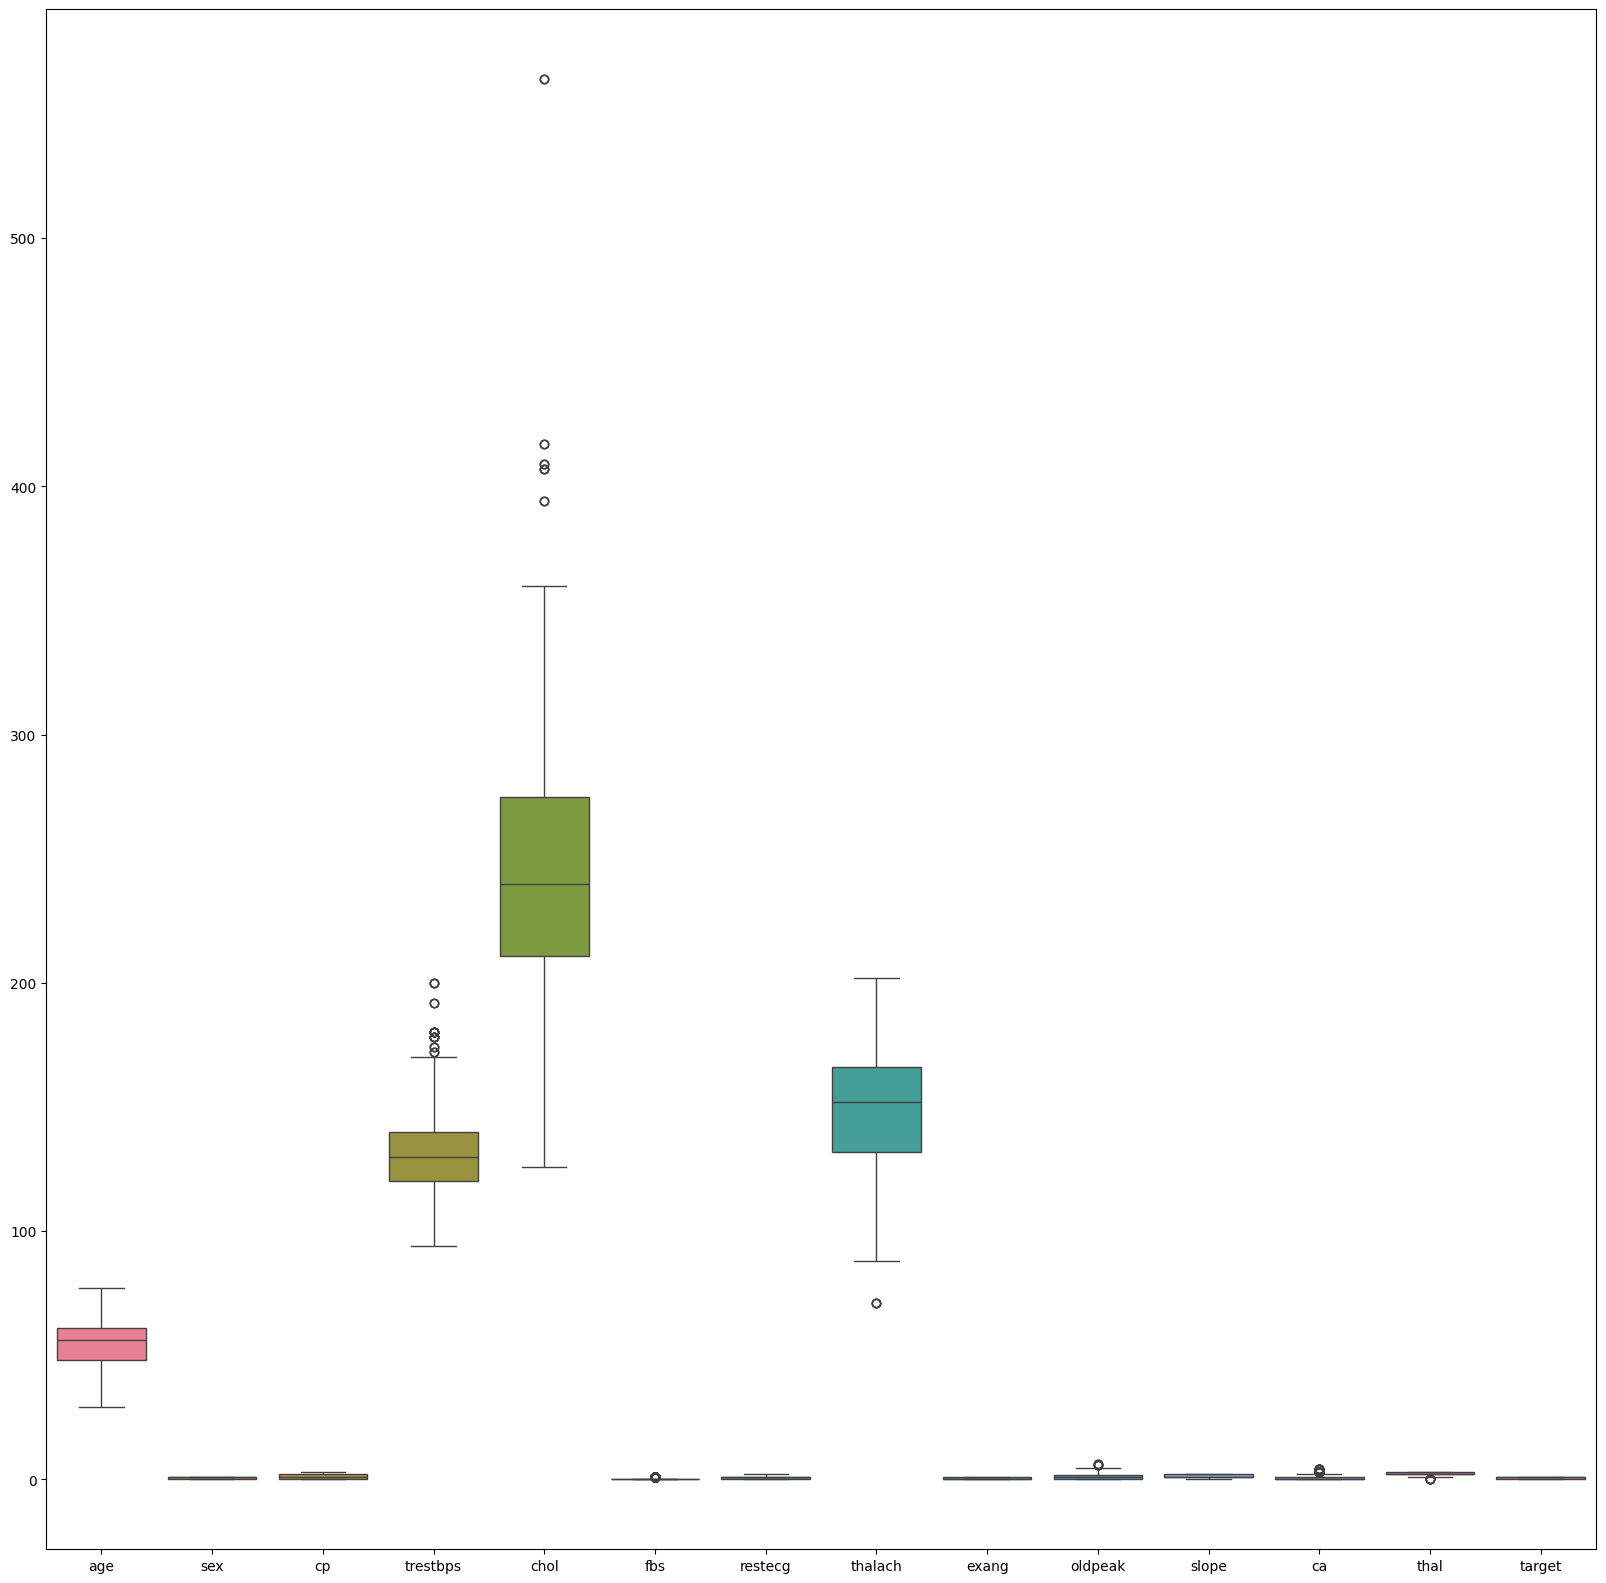

In [ ]:
# plt.figure(figsize=(20,20))
# ax = sns.boxplot(data=df)

In [ ]:
# from scipy import stats
# z = np.abs(stats.zscore(df))
# print(z)

[[0.26843658 0.66150409 0.91575542 ... 1.20922066 1.08985168 1.02669772]
 [0.15815703 0.66150409 0.91575542 ... 0.73197147 1.08985168 1.02669772]
 [1.71659547 0.66150409 0.91575542 ... 0.73197147 1.08985168 1.02669772]
 ...
 [0.81983438 0.66150409 0.91575542 ... 0.23862459 0.52212231 1.02669772]
 [0.4889957  1.51170646 0.91575542 ... 0.73197147 0.52212231 0.97399651]
 [0.04787747 0.66150409 0.91575542 ... 0.23862459 1.08985168 1.02669772]]


In [ ]:
# threshold = 3
# print(np.where(z > 3))# The first array contains the list of row numbers and second array respective column numbers

(array([ 14,  52,  54,  55,  69,  83, 123, 128, 151, 158, 175, 179, 192,
       208, 242, 246, 267, 290, 294, 296, 319, 326, 329, 340, 348, 359,
       378, 393, 417, 428, 450, 464, 465, 481, 508, 521, 526, 559, 597,
       613, 641, 665, 685, 686, 688, 734, 743, 749, 831, 833, 889, 893,
       958, 970, 993, 996]), array([12, 11,  9,  9,  9, 11,  4, 11,  3,  4,  3,  4,  4, 11, 11,  3,  7,
       11,  3,  7, 12,  3, 12, 11, 11, 12,  7,  9, 11, 11,  4,  4, 11,  4,
        3, 11,  9,  7, 11,  9,  4,  4,  4, 12,  3, 12, 11, 11, 11,  9,  4,
       12,  4, 11, 11,  4]))


In [ ]:
# Q1 = df.quantile(0.25)
# Q3 = df.quantile(0.75)
# IQR = Q3 - Q1
# print(IQR)

age         13.0
sex          1.0
cp           2.0
trestbps    20.0
chol        64.0
fbs          0.0
restecg      1.0
thalach     34.0
exang        1.0
oldpeak      1.8
slope        1.0
ca           1.0
thal         1.0
target       1.0
dtype: float64


In [ ]:
# df = df[(z < 3).all(axis=1)]
# df.shape

(969, 14)

In [ ]:
# df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
# df.shape

(769, 14)

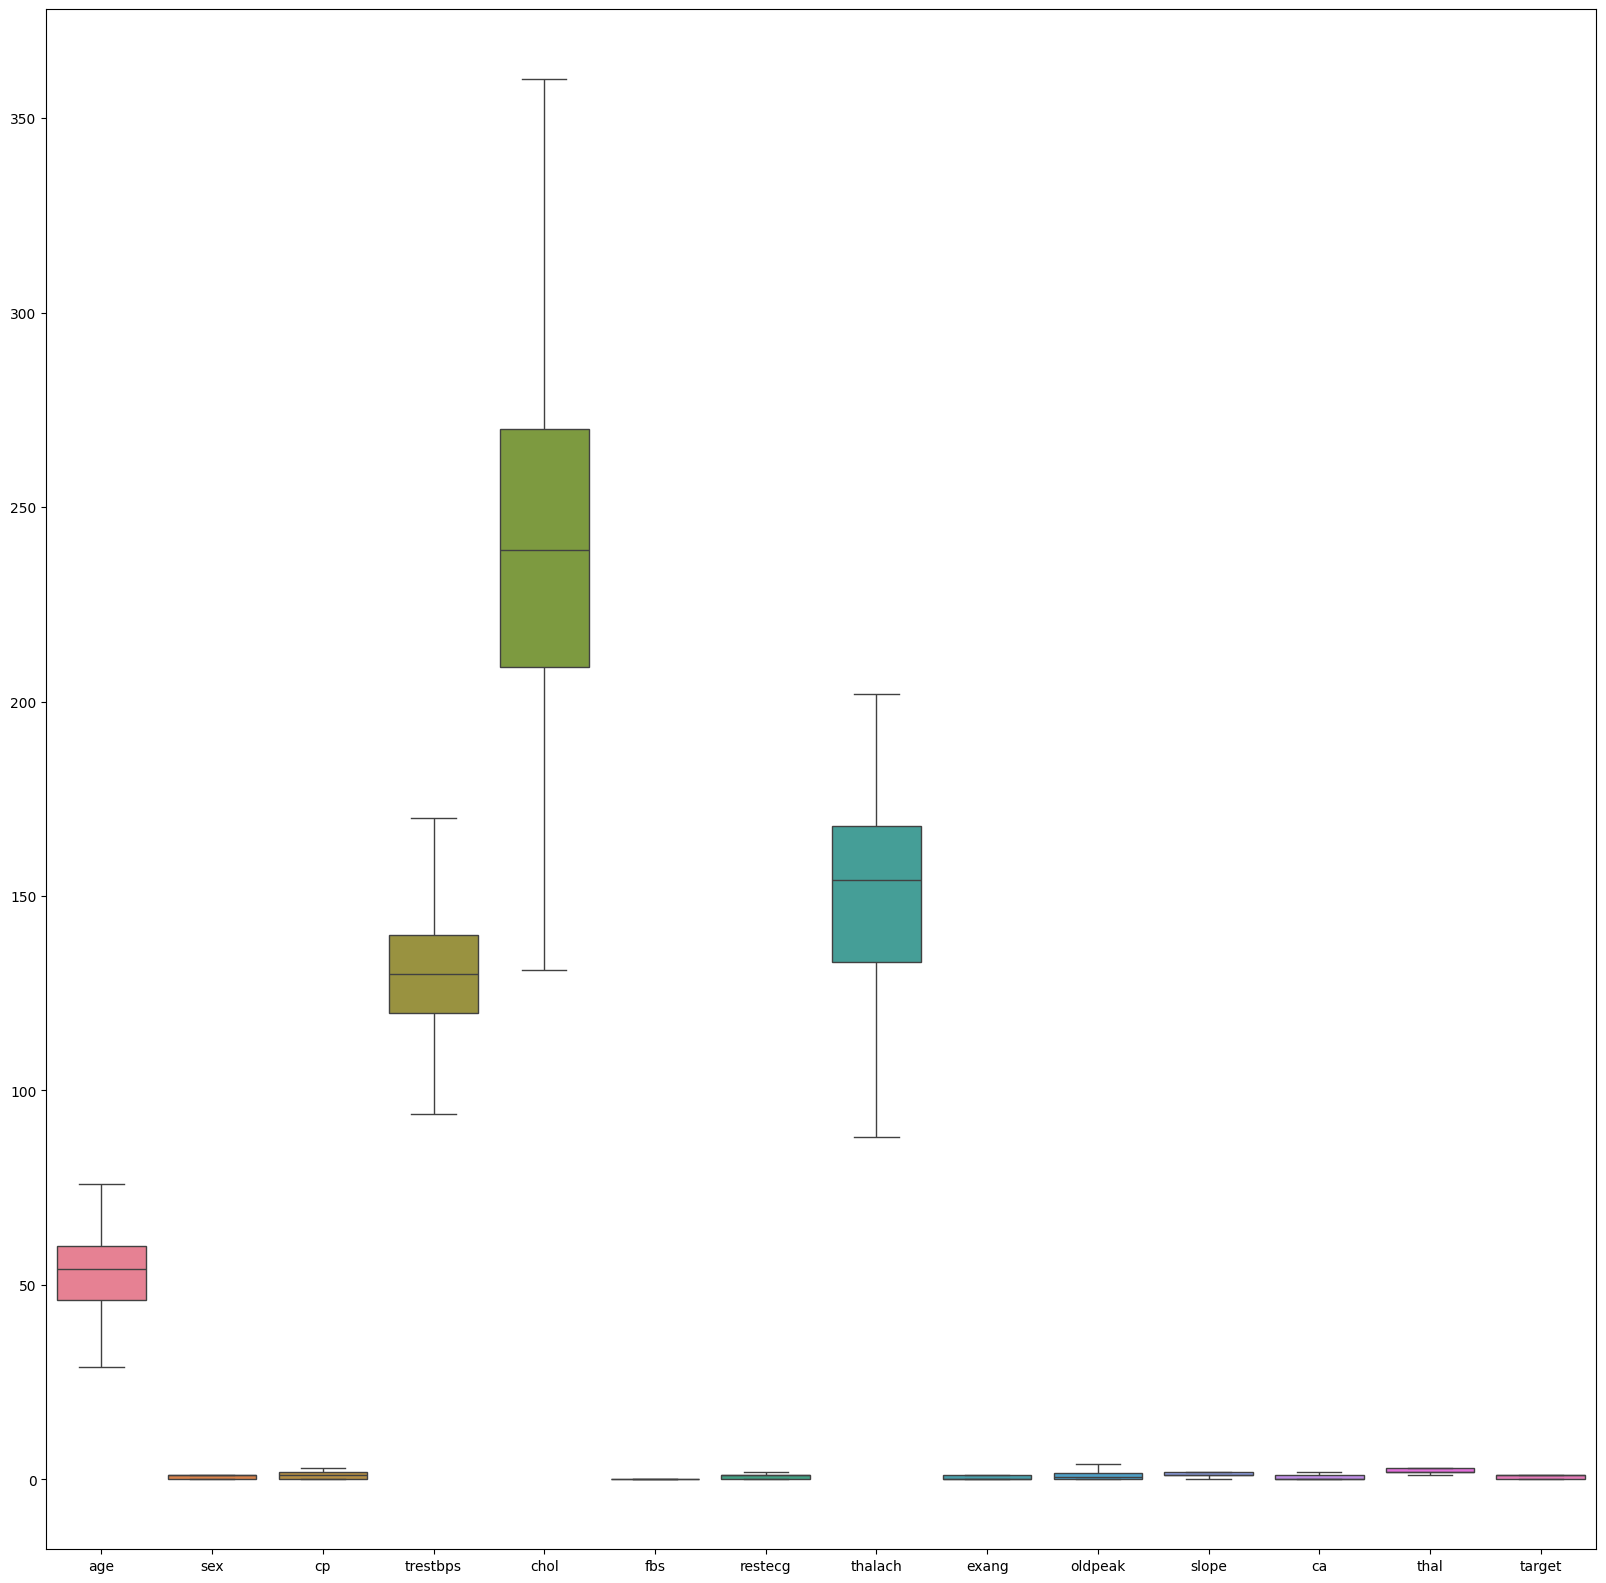

In [ ]:
# plt.figure(figsize=(20,20))
# ax = sns.boxplot(data=df)

### Check and handle missing values

In [ ]:
# print(df.isnull().sum())

# df.dropna(inplace=True)

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


### Correlation Heatmap

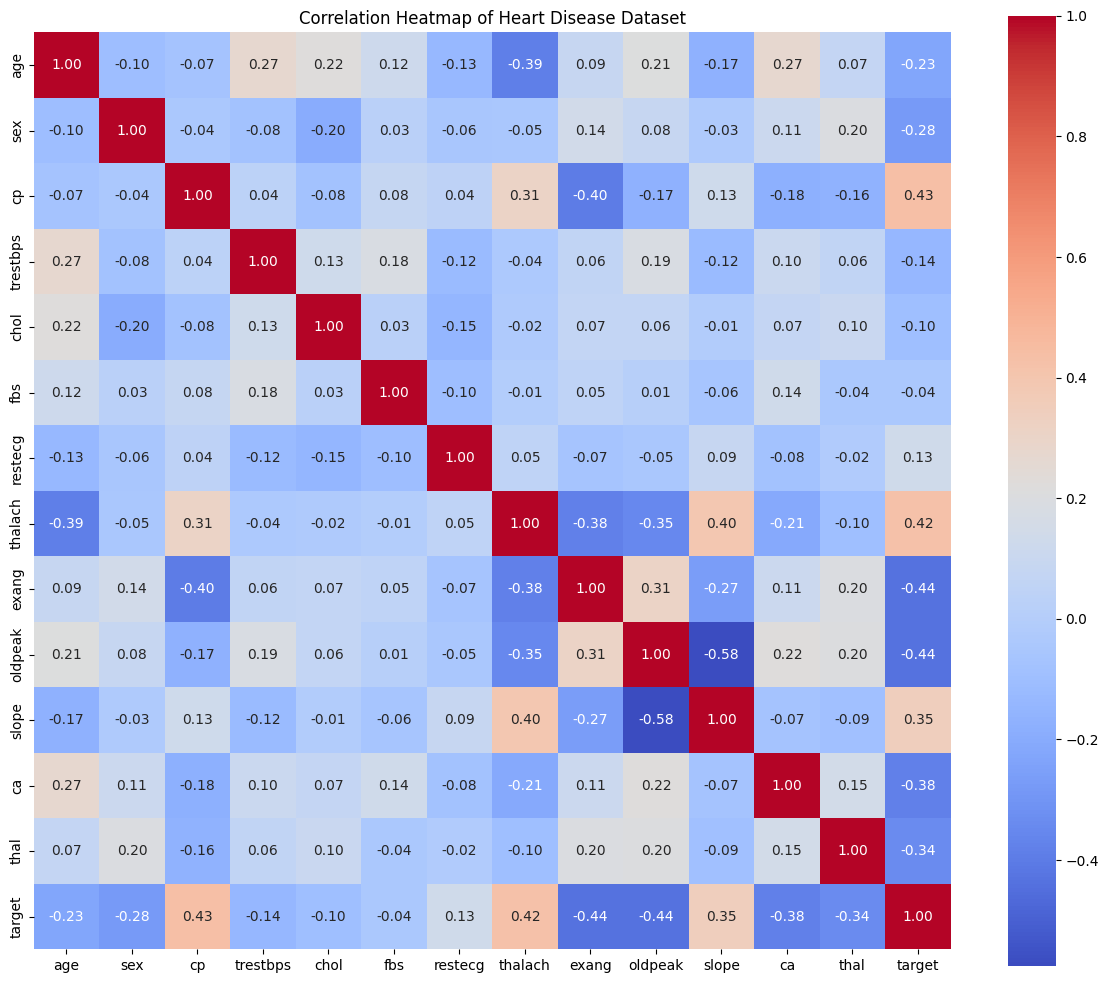

In [ ]:
# plt.figure(figsize=(12, 10))
# corr_matrix = df.corr()
# sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True, cbar=True)
# plt.title("Correlation Heatmap of Heart Disease Dataset")
# plt.tight_layout()
# plt.show()

## Model Building

### KNeignbors Classifier Model

In [119]:
# Finding the best accuracy for knn algorithm using cross_val_score 
# Tune K using cross-validation

knn_scores = []
k_range = range(1, 21)

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=10)
    knn_scores.append(round(scores.mean(), 3))

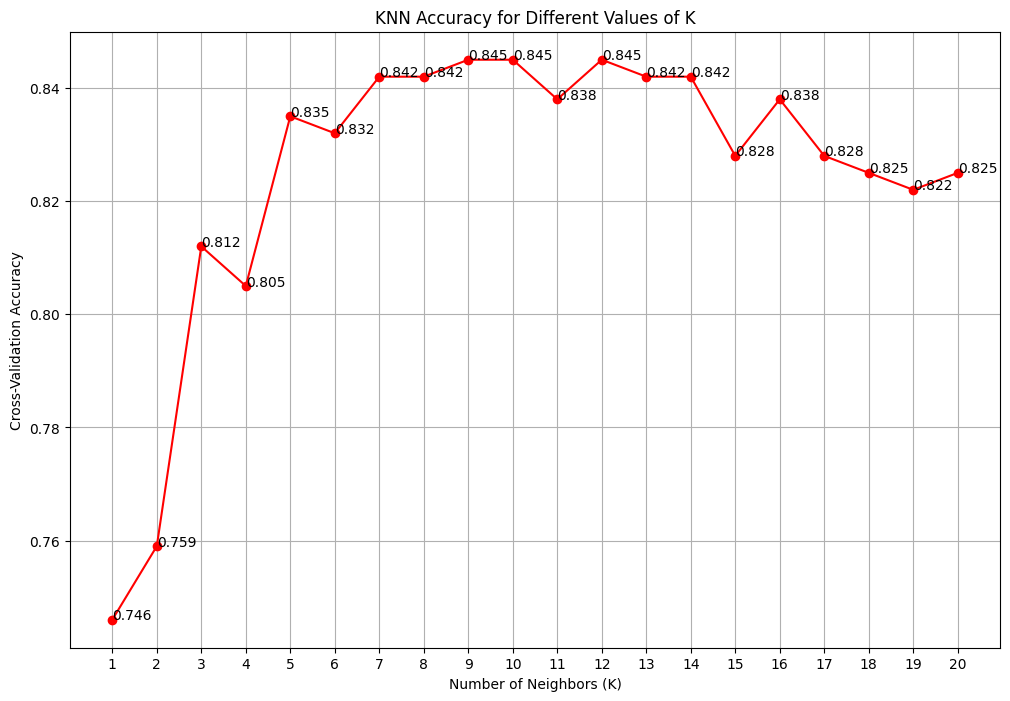

In [120]:
# Plot KNN scores

plt.figure(figsize=(12, 8))
plt.plot(k_range, knn_scores, marker='o', linestyle='-', color='red')
for i, score in enumerate(knn_scores):
    plt.text(k_range[i], score, f"{score}", fontsize=10)
plt.xticks(k_range)
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Cross-Validation Accuracy')
plt.title('KNN Accuracy for Different Values of K')
plt.grid(True)
plt.show()

In [117]:
# Train best KNN model on full dataset

best_k = knn_scores.index(max(knn_scores)) + 1
print(f"Best k value: {best_k}")

final_Knn_model = KNeighborsClassifier(n_neighbors=best_k)
final_Knn_model.fit(X, y)

Best k value: 9


,n_neighbors,9
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [92]:
# Predict on training data (since we don't have test split here)

y_pred = final_Knn_model.predict(X)

# Compute metrics
accuracy = accuracy_score(y, y_pred)
mse = mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y, y_pred)

In [ ]:
# Create results table

Knn_results = pd.DataFrame({
    'Metric': ['Accuracy', 'R² Score', 'MSE', 'RMSE'],
    'Value': [round(accuracy, 4), round(r2, 4), round(mse, 4), round(rmse, 4)]
})

Knn_results.head()

,Metric,Value
0,Accuracy,0.8647
1,R² Score,0.4544
2,MSE,0.1353
3,RMSE,0.3678


### Decision Tree Classifier

In [94]:
# Finding the best accuracy for decision tree algorithm using cross_val_score 

decision_scores = []
for i in range(1, 11):
    decision_classifier = DecisionTreeClassifier(max_depth=i)
    cvs_scores = cross_val_score(decision_classifier, X, y, cv=10)
    decision_scores.append(round(cvs_scores.mean(), 3))

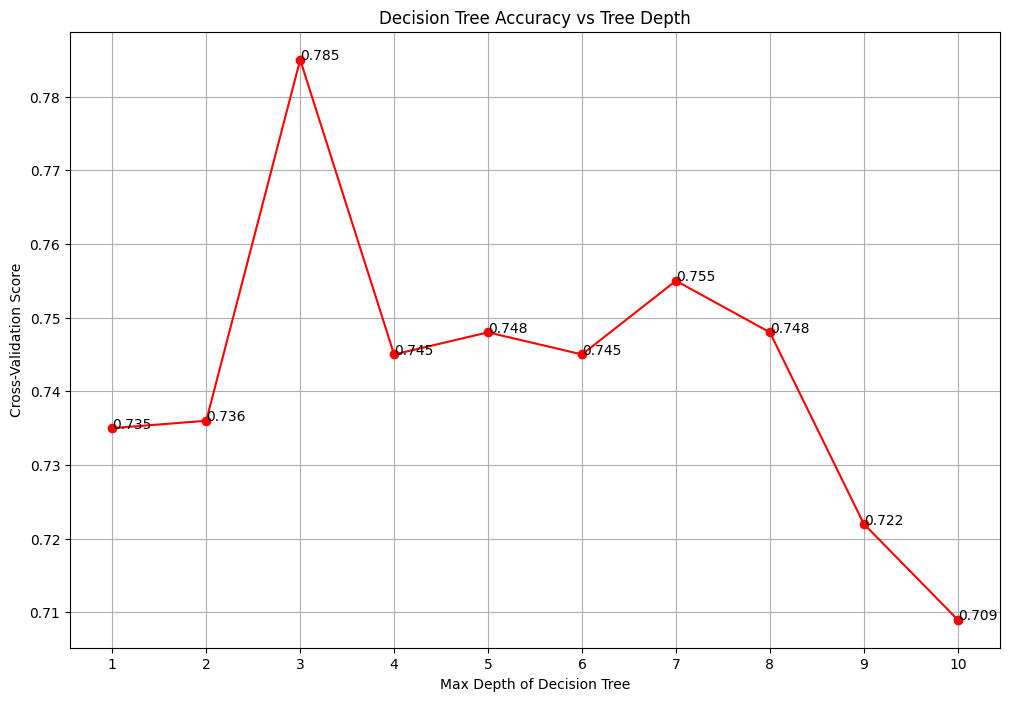

In [95]:
# Plotting scores

plt.figure(figsize=(12, 8))
plt.plot(range(1, 11), decision_scores, color='red', marker='o')
for i in range(1, 11):
    plt.text(i, decision_scores[i-1], f"{decision_scores[i-1]}")
plt.xticks(range(1, 11))
plt.xlabel('Max Depth of Decision Tree')
plt.ylabel('Cross-Validation Score')
plt.title('Decision Tree Accuracy vs Tree Depth')
plt.grid(True)
plt.show()

In [96]:
# Train final model using best depth

best_depth = decision_scores.index(max(decision_scores)) + 1
final_dt_model = DecisionTreeClassifier(max_depth=best_depth)
final_dt_model.fit(X, y)

,criterion,'gini'
,splitter,'best'
,max_depth,3
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [97]:
# Predict on training data ()

y_pred = final_dt_model.predict(X)

accuracy = accuracy_score(y, y_pred)
mse = mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y, y_pred)

In [98]:
# Create results table

dt_results = pd.DataFrame({
    'Metric': ['Accuracy', 'R² Score', 'MSE', 'RMSE'],
    'Value': [round(accuracy, 4), round(r2, 4), round(mse, 4), round(rmse, 4)]
})

dt_results.head()

,Metric,Value
0,Accuracy,0.8548
1,R² Score,0.4145
2,MSE,0.1452
3,RMSE,0.3811


### Random Forest Classifier

In [99]:
# Finding the best accuracy for random forest algorithm using cross_val_score 

forest_scores = []
n_estimators_range = range(10, 101, 10)

for n in n_estimators_range:
    forest_classifier = RandomForestClassifier(n_estimators=n, random_state=42)
    cvs_scores = cross_val_score(forest_classifier, X, y, cv=5)
    forest_scores.append(round(cvs_scores.mean(), 3))

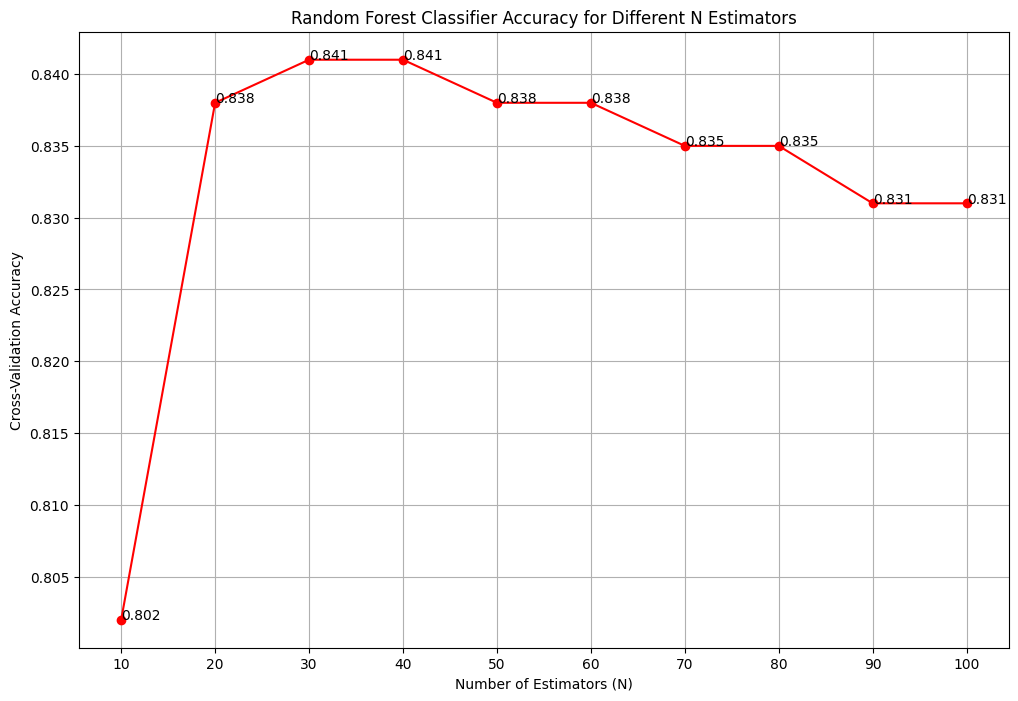

In [100]:
# Plotting the results of forest_scores

plt.figure(figsize=(12, 8))
plt.plot(list(n_estimators_range), forest_scores, color='red', marker='o')
for n, score in zip(n_estimators_range, forest_scores):
    plt.text(n, score, f"{score}")
plt.xticks(list(n_estimators_range))
plt.xlabel('Number of Estimators (N)')
plt.ylabel('Cross-Validation Accuracy')
plt.title('Random Forest Classifier Accuracy for Different N Estimators')
plt.grid(True)
plt.show()

In [101]:
# Train final model with best n_estimators

best_n = n_estimators_range[forest_scores.index(max(forest_scores))]
final_forest_model = RandomForestClassifier(n_estimators=best_n, random_state=42)
final_forest_model.fit(X, y)

,n_estimators,30
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [102]:
# Evaluate on training set

y_pred = final_forest_model.predict(X)

accuracy = accuracy_score(y, y_pred)
mse = mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y, y_pred)

In [103]:
# Display metrics in a table

results_forest = pd.DataFrame({
    'Metric': ['Accuracy', 'R² Score', 'MSE', 'RMSE'],
    'Value': [round(accuracy, 4), round(r2, 4), round(mse, 4), round(rmse, 4)]
})

print(f"Random Forest Classifier Accuracy with n_estimators={best_n} is: {round(max(forest_scores)*100, 2)}%")
print(results_forest.to_string(index=False))

Random Forest Classifier Accuracy with n_estimators=30 is: 84.1%
  Metric  Value
Accuracy    1.0
R² Score    1.0
     MSE    0.0
    RMSE    0.0


###  Predict for each model

In [104]:

# Assuming these are your trained models and predictions:
# final_knn_model, final_dt_model, final_forest_model
# and features X, target y

y_pred_knn = final_Knn_model.predict(X)
y_pred_dt = final_dt_model.predict(X)
y_pred_forest = final_forest_model.predict(X)

# Define a function to calculate metrics
def calc_metrics(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    return accuracy, r2, mse, rmse

# Calculate metrics for each model
knn_metrics = calc_metrics(y, y_pred_knn)
dt_metrics = calc_metrics(y, y_pred_dt)
forest_metrics = calc_metrics(y, y_pred_forest)

# Create comparison DataFrame
comparison_df = pd.DataFrame({
    'Model': ['K-Nearest Neighbors', 'Decision Tree', 'Random Forest'],
    'Accuracy': [round(knn_metrics[0], 4), round(dt_metrics[0], 4), round(forest_metrics[0], 4)],
    'R2 Score': [round(knn_metrics[1], 4), round(dt_metrics[1], 4), round(forest_metrics[1], 4)],
    'MSE': [round(knn_metrics[2], 4), round(dt_metrics[2], 4), round(forest_metrics[2], 4)],
    'RMSE': [round(knn_metrics[3], 4), round(dt_metrics[3], 4), round(forest_metrics[3], 4)],
})

comparison_df.head()

,Model,Accuracy,R2 Score,MSE,RMSE
0,K-Nearest Neighbors,0.8647,0.4544,0.1353,0.3678
1,Decision Tree,0.8548,0.4145,0.1452,0.3811
2,Random Forest,1.0000,1.0000,0.0000,0.0000


### Confusion Metrics

In [105]:
# Assuming y (true labels) and y_pred (model predictions) exist

def plot_confusion_matrix_heatmap(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6,5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix Heatmap for {model_name}')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()

    # Example for Random Forest model
    
    plot_confusion_matrix_heatmap(y, y_pred_forest, "Random Forest")

    # Similarly for other models:
    # plot_confusion_matrix_heatmap(y, y_pred_knn, "KNN")
    # plot_confusion_matrix_heatmap(y, y_pred_dt, "Decision Tree")

### Save Trained Models

In [121]:
import pickle
with open('Knn_model.pkl', 'wb') as f:
    pickle.dump(final_Knn_model, f)

In [ ]:
# import pickle
# all_models  = [forest_classifier,decision_classifier,knn]
# with open("models.pkl", 'wb') as files:
#     pickle.dump(all_models, files)
# print("Done")

Done


In [ ]:
# open_file = open("models.pkl", "rb")
# loaded_list = pickle.load(open_file)
# print(loaded_list)
# open_file.close()
# print("Done")

[RandomForestClassifier(random_state=42), DecisionTreeClassifier(max_depth=10), KNeighborsClassifier(n_neighbors=20)]
Done
